In [1]:
import sys
sys.path.append('../')

from src import *

In [2]:
df = load_data("../data/raw/Iris.csv")
data = preprocess_data(df)
X = data.drop(columns=['Id', 'Species'])
columns_names = X.columns
y = data['Species']
X = data_normalize(X)
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2)

Data loaded successfully.
4 outliers removed.
Data normalized successfully.
Data split successfully.


In [3]:
dim = 2
topology = [32, 16, 8]
encoder = build_encoder(dim, X_train.shape[1], topology=topology)
decoder = build_decoder(dim, X_train.shape[1], topology=topology)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input_layer │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        160 │ encoder_input_la… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        528 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8)         │        136 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean_layer        │ (None, 2)         │         18 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var_layer     │ (None, 2)         │         18 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean_layer[0][… │
│                     │                   │            │ z_log_var_layer[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 860 (3.36 KB)

 Trainable params: 860 (3.36 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input_layer             │ (None, 2)              │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 844 (3.30 KB)

 Trainable params: 844 (3.30 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
vae = VAE(encoder, decoder, beta=0.5)

In [ ]:
optmizer = optimizers.Adam(learning_rate=0.0005)
vae.compile(optimizer=optmizer)

In [6]:
model_checkpoint = model_checkpoint_callback("./checkpoint.keras")

Model checkpoint callback created.


In [7]:
vae.fit(
    X_train, 
    epochs=500, 
    batch_size=8, 
    validation_data=(X_test, None), 
    callbacks=[model_checkpoint]
)

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - kl_loss: 0.0382 - reconstruction_loss: 0.2149 - total_loss: 0.2532 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - kl_loss: 0.0194 - reconstruction_loss: -0.0760 - total_loss: -0.0566 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - kl_loss: 0.0122 - reconstruction_loss: 0.3599 - total_loss: 0.3721 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - kl_loss: 0.0127 - reconstruction_loss: 0.2926 - total_loss: 0.3053 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - kl_loss: 0.0172 - reconstruction_loss: 0.1146 - total_loss: 0.1318 - val_kl_loss: 0.0000e

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


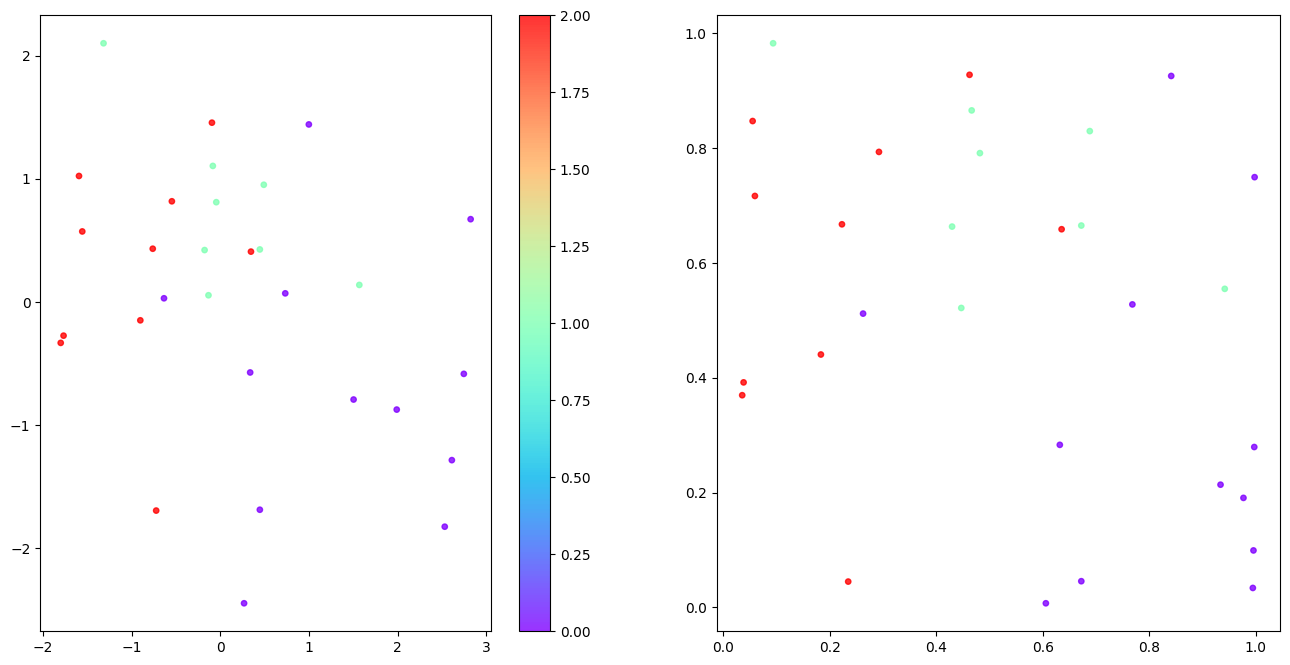

In [8]:
plot_latent_space(encoder, X_test, y_test)

In [9]:
z_mean, z_log_var, reconstructions, example_labels = predict(vae, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


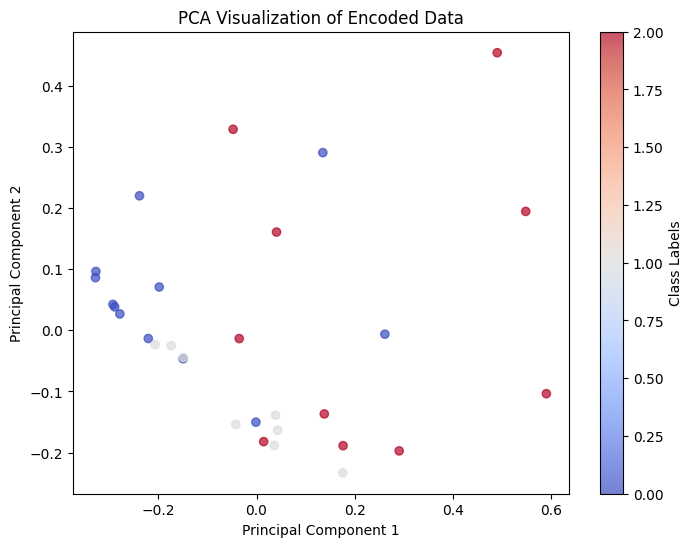

Explained variance ratio: [0.6755733 0.3095642]


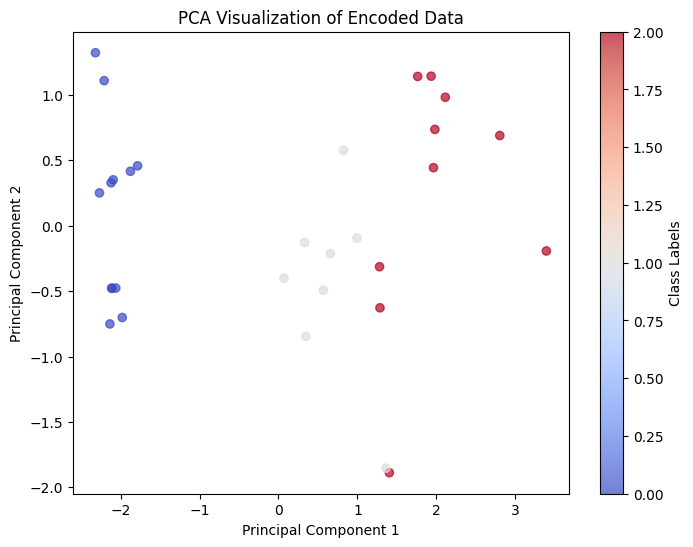

Explained variance ratio: [0.80812541 0.1538968 ]


In [10]:
plot_reduced_pca(reconstructions, example_labels)
plot_reduced_pca(X_test, example_labels)

In [11]:
import numpy as np

print("Latent Mean Variance:", np.var(z_mean, axis=0))
print("Latent Log-Variance:", np.mean(z_log_var, axis=0))


Latent Mean Variance: [0.71219796 0.11358284]
Latent Log-Variance: [-0.04786406  0.01092032]


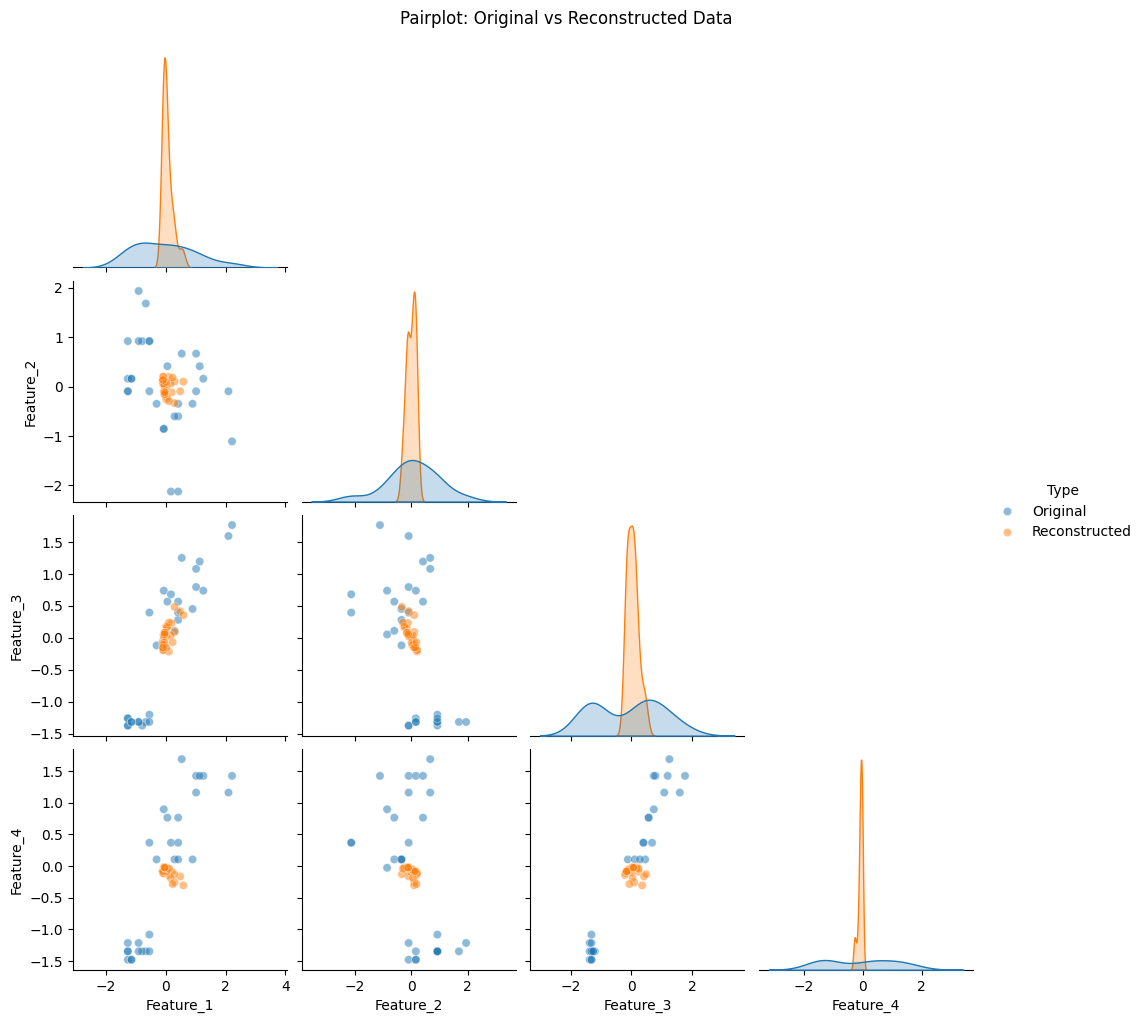

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure data has the same shape
assert X_test.shape == reconstructions.shape, "Mismatch in data dimensions!"

# Convert to DataFrame with feature names
feature_names = [f"Feature_{i+1}" for i in range(X_test.shape[1])]
df_original = pd.DataFrame(X_test, columns=feature_names)
df_reconstructed = pd.DataFrame(reconstructions, columns=feature_names)

# Add labels to distinguish datasets
df_original["Type"] = "Original"
df_reconstructed["Type"] = "Reconstructed"

# Concatenate for visualization
df_combined = pd.concat([df_original, df_reconstructed])

# Pairplot with color-coded types
sns.pairplot(df_combined, hue="Type", plot_kws={"alpha": 0.5}, corner=True)
plt.suptitle("Pairplot: Original vs Reconstructed Data", y=1.02)
plt.show()

